In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import *

In [15]:
# load the useful dataset for the task 1
df = pd.read_csv("Big_Cleaned_dataset.csv")

In [16]:
df.head()

,Unnamed: 0,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Actor_gender,Actor_height_m,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Main_genre,Main_country
0,0,Ghosts of Mars,2001.0,14010832.0,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",F,1.620,NaN,Wanda De Jesus,42.0,Thriller,United States of America
1,1,Ghosts of Mars,2001.0,14010832.0,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",F,1.780,/m/044038p,Natasha Henstridge,27.0,Thriller,United States of America
2,2,Ghosts of Mars,2001.0,14010832.0,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",M,1.727,/m/0x67,Ice Cube,32.0,Thriller,United States of America
3,3,Ghosts of Mars,2001.0,14010832.0,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",M,1.750,NaN,Jason Statham,33.0,Thriller,United States of America
4,4,Ghosts of Mars,2001.0,14010832.0,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",F,1.650,NaN,Clea DuVall,23.0,Thriller,United States of America


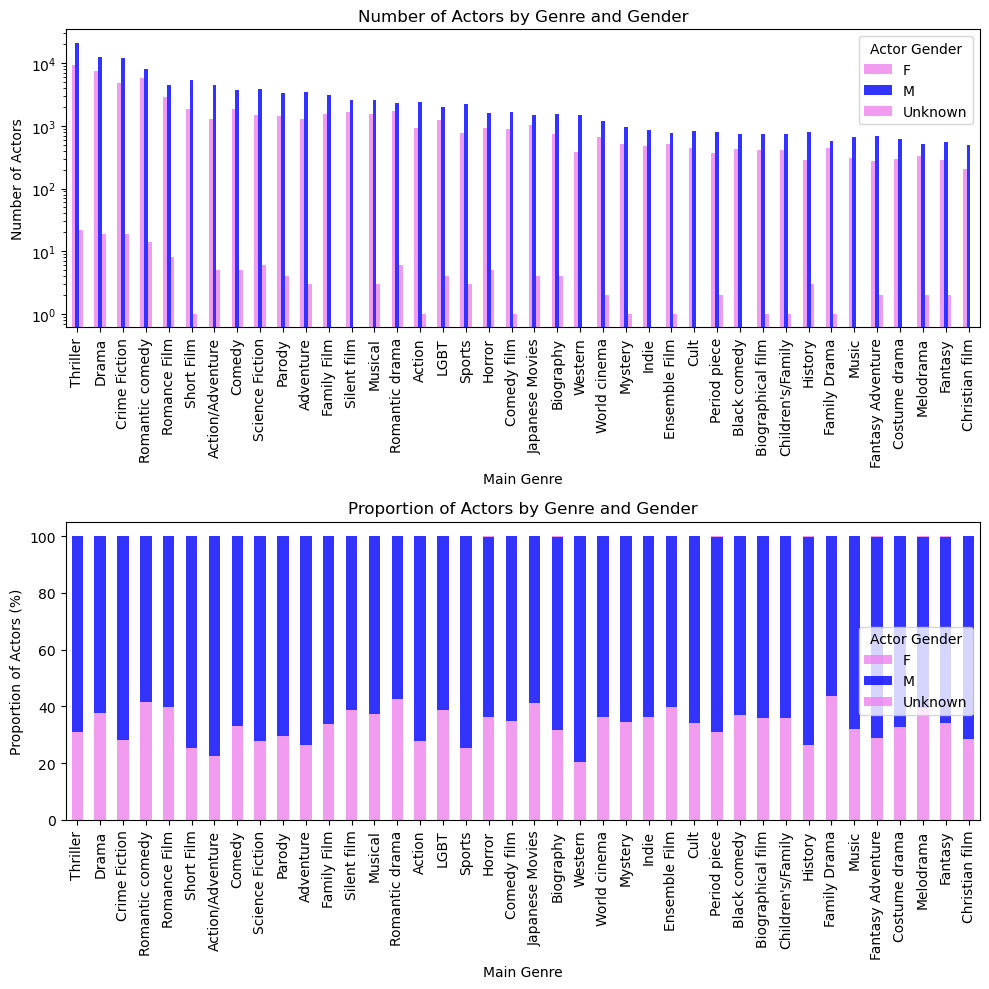

In [17]:

datafirstplot_genre = pd.crosstab(df['Main_genre'], df['Actor_gender'])

top_40_genres = datafirstplot_genre.sum(axis=1).nlargest(40).index
datafirstplot_genre_top_40 = datafirstplot_genre.loc[top_40_genres]

datafirstplot_proportion_genre = datafirstplot_genre_top_40.div(datafirstplot_genre_top_40.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

datafirstplot_genre_top_40.plot(kind='bar', stacked=False, ax=ax1, color=['violet', 'blue'], alpha=0.8)
ax1.set_xlabel("Main Genre")
ax1.set_ylabel("Number of Actors")
ax1.set_title("Number of Actors by Genre and Gender")
ax1.set_yscale('log')
ax1.legend(title="Actor Gender")

datafirstplot_proportion_genre.plot(kind='bar', stacked=True, ax=ax2, color=['violet', 'blue'], alpha=0.8)
ax2.set_xlabel("Main Genre")
ax2.set_ylabel("Proportion of Actors (%)")
ax2.set_title("Proportion of Actors by Genre and Gender")
ax2.legend(title="Actor Gender")

plt.tight_layout()
plt.show()

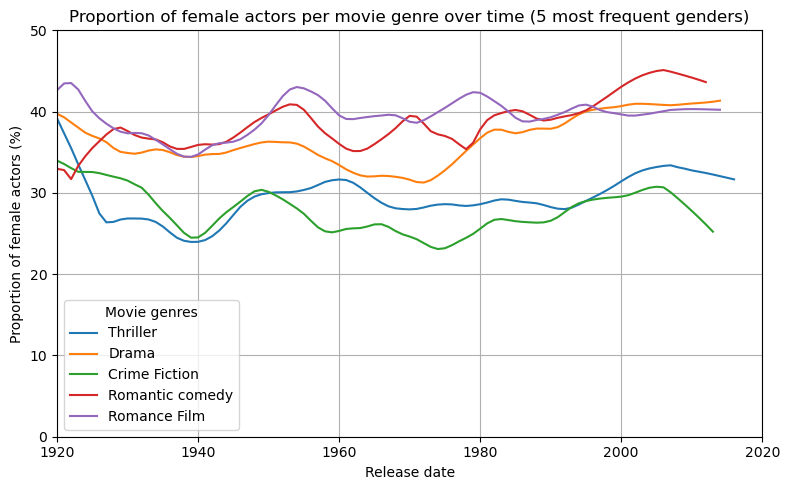

In [18]:
import statsmodels.api as sm

big_df_genres = df.explode('Main_genre') #separate lines by movie genre
genre_counts = big_df_genres['Main_genre'].value_counts()


nb_top = 5
top_X_genres = genre_counts.head(nb_top).index
#top_X_genres = ['Drama', 'Comedy', 'Romance Film', 'Thriller', 'Action', 'Crime Fiction', 'Adventure', 'Horror', 'Fantasy']

cmap = plt.get_cmap('tab10', nb_top)
#colors = [cmap(i) for i in range(nb_top)]

big_df_top_genres = big_df_genres[big_df_genres['Main_genre'].isin(top_X_genres)]

gender_per_genre = big_df_top_genres.groupby(["Movie_release_date", "Main_genre", "Actor_gender"]).size().unstack(fill_value=0)
gender_per_genre['Female_Proportion'] = gender_per_genre['F']/gender_per_genre.sum(axis=1)*100

plt.figure(figsize=(8,5))
for i, genre in enumerate(top_X_genres):
    genre_data = gender_per_genre.xs(genre, level='Main_genre')
    #plt.plot(genre_data.index, genre_data['Female_Proportion'], alpha = 0.25)
    smoothed = sm.nonparametric.lowess(genre_data['Female_Proportion'], genre_data.index, frac=0.15)
    plt.plot(smoothed[:,0], smoothed[:, 1], label=f'{genre}')

plt.xlabel("Release date")
plt.ylabel("Proportion of female actors (%)")
plt.title(f"Proportion of female actors per movie genre over time ({nb_top} most frequent genders)")
plt.xlim(1920,2020)
plt.ylim(0, 50)
plt.legend(title="Movie genres")
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:

# get decade
df['Decade'] = (df['Movie_release_date'] // 10 * 10).astype(int)

# Count the frequency of each genre
genre_counts = df['Movie_genres'].value_counts()

# Select the top 20 genres
top_10_genres = genre_counts.head(10).index

# Filter the dataset to include only movies within the top 20 genres
df = df[df['Movie_genres'].isin(top_10_genres)]

# Filter necessary columns
df = df[['Decade', 'Movie_genres', 'Actor_gender']]

# Group by decade and genre to calculate gender counts
gender_counts = df.groupby(['Decade', 'Movie_genres', 'Actor_gender']).size().reset_index(name='Count')

# Pivot table to make analysis easier
pivot_data = gender_counts.pivot_table(index=['Decade', 'Movie_genres'], 
                                       columns='Actor_gender', 
                                       values='Count', 
                                       fill_value=0).reset_index()

# Calculate male-to-female ratio
pivot_data['M_F_Ratio'] = pivot_data.get('M', 0) / (pivot_data.get('F', 0) + 1e-10)  # Avoid division by zero


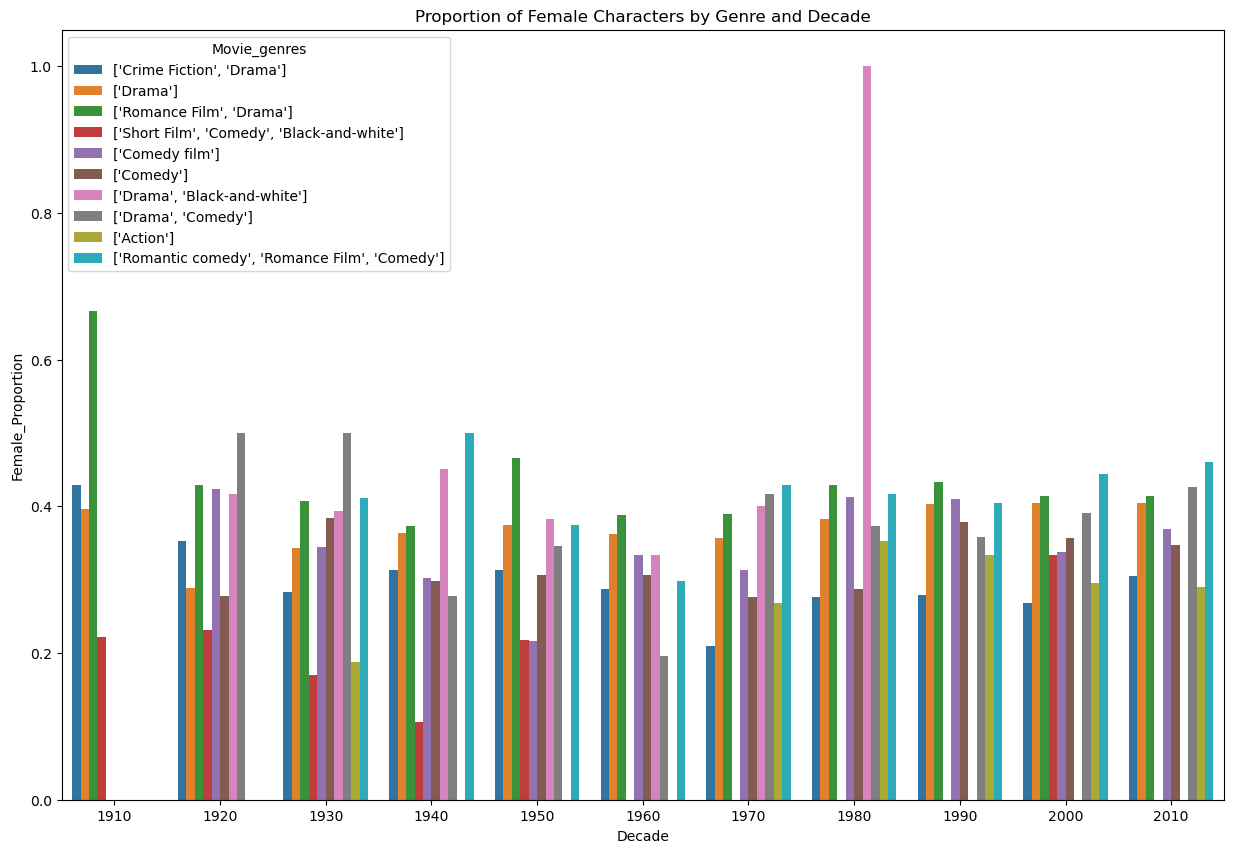

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot proportion of male vs female by genre and decade
pivot_data['Total'] = pivot_data['M'] + pivot_data['F']
pivot_data['Male_Proportion'] = pivot_data['M'] / pivot_data['Total']
pivot_data['Female_Proportion'] = pivot_data['F'] / pivot_data['Total']

plt.figure(figsize=(15, 10))
sns.barplot(data=pivot_data, x='Decade', y='Female_Proportion', hue='Movie_genres')
plt.title('Proportion of Female Characters by Genre and Decade')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pivot_data.pivot_table(index='Movie_genres', 
                                           columns='Decade', 
                                           values=['M', 'F'], 
                                           aggfunc='sum', 
                                           fill_value=0).values

chi2, p, dof, expected = (contingency_table)

print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}")
if p < 0.05:
    print("Significant relationship between gender distribution and genre over decades.")
else:
    print("No significant relationship found.")


ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).

In [12]:
import statsmodels.api as sm

# Example for a specific genre (e.g., Thriller)
thriller_data = pivot_data[pivot_data['Movie_genres'] == 'Thriller']
X = thriller_data['Decade']
y = thriller_data['M_F_Ratio']

# Add constant for regression
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

# Plot the trend
plt.figure(figsize=(10, 6))
plt.scatter(thriller_data['Decade'], thriller_data['M_F_Ratio'], label='Data Points')
plt.plot(thriller_data['Decade'], model.predict(X), color='red', label='Trend Line')
plt.title('Trend of Male-to-Female Ratio in Thriller Movies')
plt.xlabel('Decade')
plt.ylabel('M/F Ratio')
plt.legend()
plt.show()


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
df_CPI = pd.read_csv("CPI.csv")
base = 100 # based on the year 1984
df.merge(df_CPI, on = 'year', how = 'left') 
df["Movie_box_office_scaled"] = df["Movie_box_office_revenue"] / df["CPI"] * base
df.drop(columns = ["CPI", "Movie_box_office_revenue"], inplace = True)